# Same sign analysis

- Look at some control region (TTbar or/and DY) 
- Look at the number and shapes of WJets MC for opp sign
- Look at Data same sign region of control region and compare

- Excess might be QCD

ToDo:

Look at at lepton pt and other features in bins of lepton pt.


In [1]:
run ../prep_ana.py

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading plotting specs...
8 or 13 TeV:
Loading 8TeV
unc_mc_process and scales as dictionaries
Load MC and Data?True
Correct MET?True
df = pd.concat([df_dy0, df_dy1, df_dy2, df_dy3, df_dy4, df_dy_m_10, df_ww, df_tt_l, df_tt_sl, df_zz_ln, df_wz_ln, df_wz_lq ])


In [2]:
%matplotlib inline

In [3]:
df_da_a = rp.read_root(data_path+"/muon_2012A_complete.root")
df_da_b = rp.read_root(data_path+"/muon_2012B_complete.root")
df_da_c = rp.read_root(data_path+"/muon_2012C_complete.root")
df_da_d = rp.read_root(data_path+"/muon_2012D_complete.root")

df_da = pd.concat([df_da_a, df_da_b, df_da_c, df_da_d])

In [4]:
def same_sign(df):   
    return  df[df.lep1_Charge == df.lep2_Charge]
def opp_sign(df):
    return  df[df.lep1_Charge != df.lep2_Charge]

In [63]:
def wj_ana_plt(feature="mll", bins = 10, title=None):

    mc = bin_df( same_sign(TT_ana(df)), feature, bins=bins)
    da = bin_df( same_sign(TT_ana(df_da)), feature, bins=bins)

    no_list = ['W1JetsToLNu', 'W2JetsToLNu', 'W3JetsToLNu', 'W4JetsToLNu', 'plotting']

    wj_da = copy.deepcopy(da['Da'])
    for i in mc.keys():
        if i in no_list: continue
        wj_da[0] -= mc[i][0]
    #print wj_da[0]
    mc = bin_df( opp_sign(TT_ana(df)), feature, bins=bins)
    for i, l in enumerate(['W1JetsToLNu', 'W2JetsToLNu', 'W3JetsToLNu', 'W4JetsToLNu']):
        if i ==0 : wj_mc = mc[l][0]
        wj_mc += mc[l][0]
    xerr =  (mc[l][1][1] - mc[l][1][0]) / 2.
    fig, ax  = plt.subplots(1,1, figsize=(9,6))
    ax.errorbar( mc['WW'][2], wj_da[0], yerr=np.sqrt(wj_da[0]), xerr=xerr, ecolor='black',color="blue",fmt="o", label="Data driven" )
    ax.errorbar( mc['WW'][2], wj_mc, yerr=np.sqrt(wj_mc), xerr=xerr, ecolor='black',color="red",fmt="o", label="MC")
    ax.legend()
    if title==None: plt.xlabel(" ".join(feature.split("_")))
    else: plt.xlabel(title)

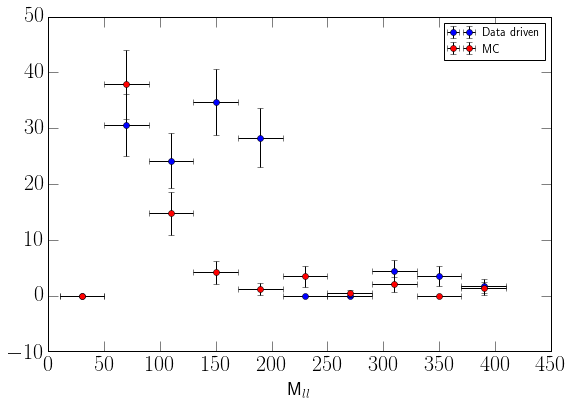

In [66]:
wj_ana_plt(feature="mll", title=r"M_{ll}")

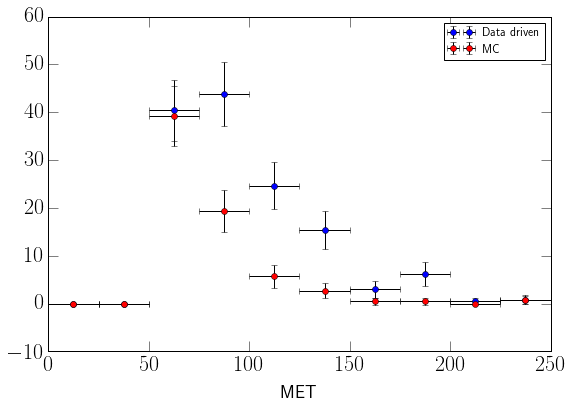

In [67]:
wj_ana_plt(feature="metMod", title=r"MET")

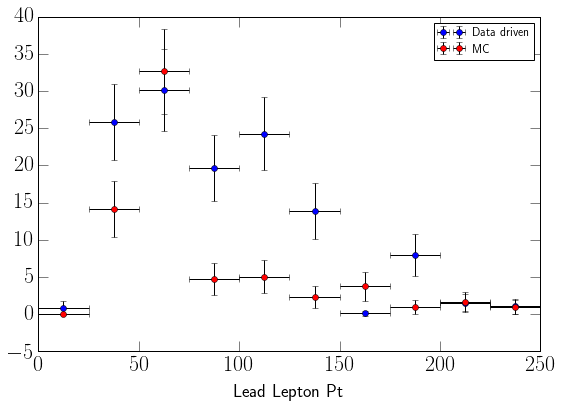

In [70]:
wj_ana_plt(feature="lep1_pt", title=r"Lead Lepton Pt")

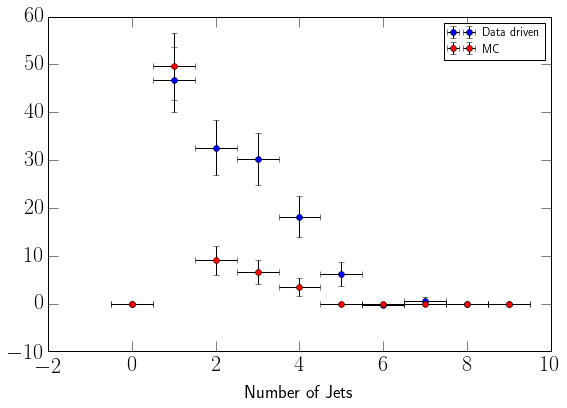

In [69]:
wj_ana_plt(feature="numb_jets", title="Number of Jets")

In [61]:
def wj_ana_plt_(feature="mll", bins = 10):

    mc = bin_df( same_sign(TT_ana(df)), feature, bins=bins)
    da = bin_df( same_sign(TT_ana(df_da)), feature, bins=bins)

    no_list = ['W1JetsToLNu', 'W2JetsToLNu', 'W3JetsToLNu', 'W4JetsToLNu', 'plotting']

    wj_da = copy.deepcopy(da['Da'])
    for i in mc.keys():
        if i in no_list: continue
        wj_da[0] -= mc[i][0]
    #print wj_da[0]
    mc = bin_df( opp_sign(TT_ana(df)), feature, bins=bins)
    da = bin_df( opp_sign(TT_ana(df_da)), feature, bins=bins)
    wj_mc = copy.deepcopy(da['Da'])
    for i in mc.keys():
        if i in no_list: continue
        wj_mc[0] -= mc[i][0]

    xerr =  (mc["WW"][1][1] - mc["WW"][1][0]) / 2.
    fig, ax  = plt.subplots(1,1, figsize=(9,6))
    ax.errorbar( mc['WW'][2], wj_da[0], yerr=np.sqrt(wj_da[0]), xerr=xerr, ecolor='black',color="blue",fmt="o", label="Data driven same" )
    ax.errorbar( mc['WW'][2], wj_mc[0], yerr=np.sqrt(wj_mc[0]), xerr=xerr, ecolor='black',color="red",fmt="o", label="Data driven opp")
    ax.legend()
    plt.xlabel(" ".join(feature.split("_")))

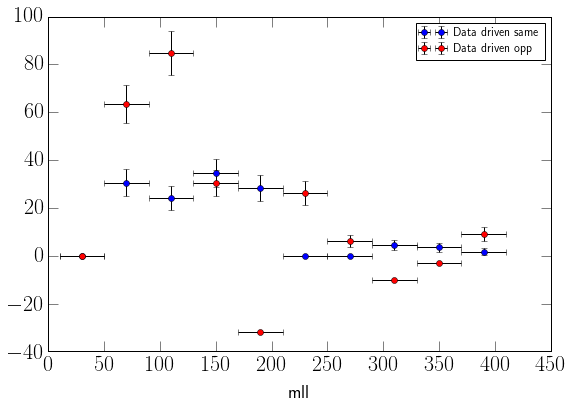

In [62]:
wj_ana_plt_( feature="mll")